In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

EGDI

In [3]:
egdi = pd.read_csv('EGOV_DATA_2024.csv')

In [4]:
egdi = egdi.sort_values(by='Country Name', ascending=True).reset_index(drop=True)

EGOV

In [5]:
egov = egdi.melt(
    id_vars='Country Name',
    value_vars='E-Government Index',
    var_name='Metric',
    value_name='EGOV'
)

In [6]:
egov = egov.iloc[:, [0, 2]]

LIST

In [7]:
countries = egdi['Country Name'].tolist()

PIB PER CAPITA PPC

In [8]:
pib = pd.read_csv('updated_wb_gdp_percapita_ppc.csv')

In [9]:
pib = pib.melt(
    id_vars='Country Name',
    value_vars='2024',
    var_name='Ano',
    value_name='PIB'
)

In [10]:
pib = pib[pib['Country Name'].isin(countries)]

In [11]:
pib = pib.sort_values(by='Country Name', ascending=True).reset_index(drop=True)

In [12]:
pib = pib.fillna(0.0)

In [13]:
pib = pib.iloc[:, [0, 2]]

DISPERSÃO

In [14]:
egov_pib = egov.copy()

In [15]:
egov_pib['Produto Interno Bruto'] = pib['PIB']

In [16]:
egov_pib = egov_pib.rename(columns={'EGOV': 'E-Government Development Index'})

In [17]:
egov_pib = egov_pib.iloc[:, [1, 2]]

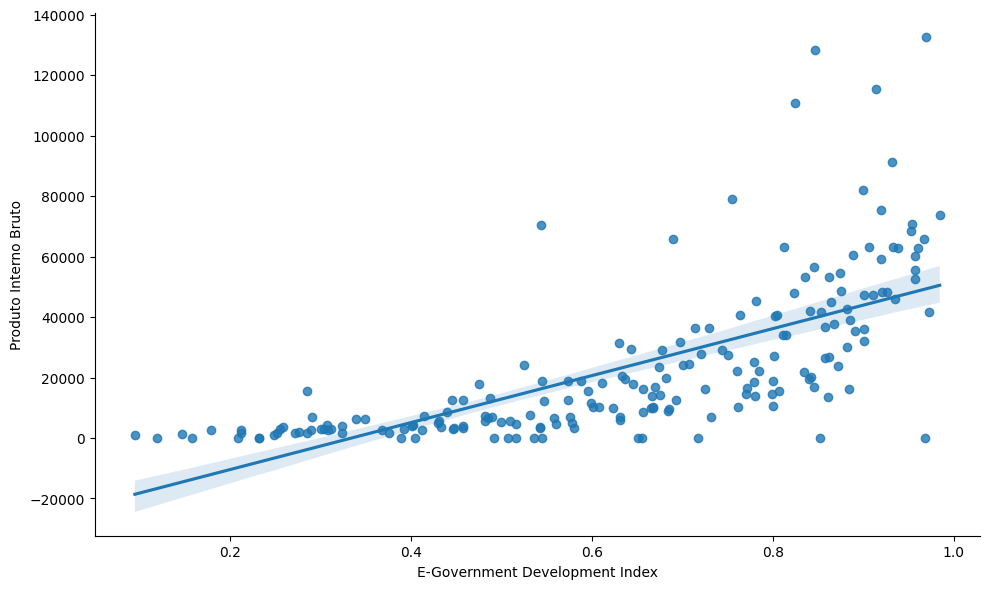

In [18]:
plt.figure(figsize=(10, 6))

sns.regplot(data=egov_pib, x='E-Government Development Index', y='Produto Interno Bruto')

sns.despine()
plt.tight_layout()
plt.savefig('C:/Users/lazar/Master-Dissertation/figuras/egdi/dispensao_egov_pib.png', dpi=300, bbox_inches='tight')
plt.show()